<a href="https://colab.research.google.com/github/IgnatiusEzeani/NLP-Lecture/blob/main/Week_18_Lab_Text_Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Credit**: The example code below was taken from [Chapters 6 of the NLTK book](https://www.nltk.org/book/ch06.html).

# **Section 1**

## Gender Identification

NLTK has a wordlist corpus, `Names`, containing 8,000 first names categorized by gender. The male and female names are stored in separate files. Let's find names which appear in both files, i.e. names that are ambiguous for gender:

### **Import `nltk` and download the `name` corpus**

In [1]:
!pip install nltk matplotlib
import nltk
import random
nltk.download('names')
names = nltk.corpus.names 

[nltk_data] Downloading package names to /home/andrew/nltk_data...
[nltk_data]   Package names is already up-to-date!


### **Names in both male and female list**

In [2]:
print(names.fileids())
male_names = names.words('male.txt')
female_names = names.words('female.txt')
male_female = [w for w in male_names if w in female_names]
print(len(male_female))
for name in male_female[:20]:
  print(name)

['female.txt', 'male.txt']
365
Abbey
Abbie
Abby
Addie
Adrian
Adrien
Ajay
Alex
Alexis
Alfie
Ali
Alix
Allie
Allyn
Andie
Andrea
Andy
Angel
Angie
Ariel



### **Distribution of last letters**
According to [NLTK](https://www.nltk.org/book/ch02.html#sec-lexical-resources) suggests that male and female names have some distinctive characteristics. Names ending in `a`, `e` and `i` are likely to be female, while names ending in `k`, `o`, `r`, `s` and `t` are likely to be male. Let's see...

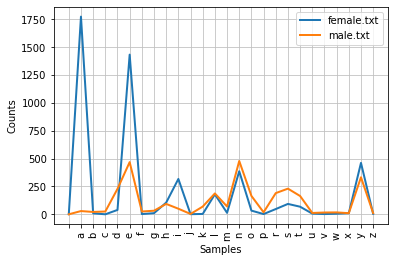

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [3]:
cfd = nltk.ConditionalFreqDist(
    (fileid, name[-1])
    for fileid in names.fileids()
    for name in names.words(fileid))
cfd.plot()

### **Feature extractor functions**
Let's build a classifier to model these differences more precisely. The first step in creating a classifier is deciding what features of the input are relevant, and how to encode those features. For this example, we'll start by just looking at the final letter of a given name.

The following feature extractors function builds a dictionary containing relevant information about a given name

In [24]:
from typing import Dict, Any
# feature extractor 1
def gender_features(word: str) -> Dict[str, Any]:
  return {'last_letter': word[-1]}

# feature extractor 2
def gender_features2(name: str) -> Dict[str, Any]:
    features = {}
    features["first_letter"] = name[0].lower()
    features["last_letter"] = name[-1].lower()
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features["count({})".format(letter)] = name.lower().count(letter)
        features["has({})".format(letter)] = (letter in name.lower())
    return features

# feature extractor 3
def gender_features3(word: str) -> Dict[str, Any]:
  return {'suffix1': word[-1:], 'suffix2': word[-2:]}

### **Compiling the training instances**

In [5]:
# Building the training instances
labeled_names = ([(name, 'male') for name in names.words('male.txt')] 
                 + [(name, 'female') for name in names.words('female.txt')])
random.shuffle(labeled_names)
# len(labeled_names)

### **Train-DevTest-Test Split**

In [6]:
# train-devtest-test split
train_names = labeled_names[1500:]
devtest_names = labeled_names[500:1500]
test_names = labeled_names[:500]
print(len(train_names), len(devtest_names), len(test_names))

6444 1000 500


### **Extracting the features**

In [7]:
# Extracting the features
train_set = [(gender_features(n), gender) for (n, gender) in train_names]
devtest_set = [(gender_features(n), gender) for (n, gender) in devtest_names]
test_set = [(gender_features(n), gender) for (n, gender) in test_names]

### **Training and Testing the Classifier**

In [8]:
# Training the classifier
random.shuffle(train_set)
classifier = nltk.NaiveBayesClassifier.train(train_set)

# apply the classifier to the development test
print("Accuracy = ", nltk.classify.accuracy(classifier, devtest_set))

Accuracy =  0.763


### **Building the Error List**

In [9]:
# error analysis
errors = []
for (name, tag) in devtest_names:
  guess = classifier.classify(gender_features(name))
  if guess != tag:
    errors.append((tag, guess, name))

### **Show errors**

In [10]:
# Error list
print("Errors:", len(errors))
for (tag, guess, name) in sorted(errors[:20]):
  print('correct={:<8} guess={:<8s} name={:<30}'.format(tag, guess, name))

Errors: 237
correct=female   guess=male     name=Bell                          
correct=female   guess=male     name=Birgit                        
correct=female   guess=male     name=Garland                       
correct=female   guess=male     name=Hester                        
correct=female   guess=male     name=Kathleen                      
correct=female   guess=male     name=Lilias                        
correct=female   guess=male     name=Magdalen                      
correct=female   guess=male     name=Sharyl                        
correct=female   guess=male     name=Sinead                        
correct=female   guess=male     name=Violet                        
correct=male     guess=female   name=Aguste                        
correct=male     guess=female   name=Alfie                         
correct=male     guess=female   name=Antony                        
correct=male     guess=female   name=Keith                         
correct=male     guess=female   name

### **Most informative features**

In [11]:
# Most informative features
classifier.show_most_informative_features(10)

Most Informative Features
             last_letter = 'k'              male : female =     37.4 : 1.0
             last_letter = 'a'            female : male   =     34.5 : 1.0
             last_letter = 'f'              male : female =     15.2 : 1.0
             last_letter = 'v'              male : female =     12.9 : 1.0
             last_letter = 'p'              male : female =     11.8 : 1.0
             last_letter = 'd'              male : female =      9.7 : 1.0
             last_letter = 'm'              male : female =      8.4 : 1.0
             last_letter = 'o'              male : female =      7.9 : 1.0
             last_letter = 'w'              male : female =      7.5 : 1.0
             last_letter = 'r'              male : female =      7.3 : 1.0


### **Classifying other names**

In [12]:
print(classifier.classify(gender_features('Neo')))
# Output: 'male'
print(classifier.classify(gender_features('Trinity')))
# Output: 'female'

male
female


### **Classifying your name**

In [13]:
## Uncomment and modify below to classify your name with your best classifier
# print(classifier.classify(gender_features(<your name>))) #remember to change your 

## **Task 1**

Write a code that trains three different classifiers (`classifier1`, `classifier2` and `classifier3`) using the three feature extractor functions defined above `gender_features()`, `gender_features2()` and `gender_features3()`.

1. Apply the the three classifiers to the `dev_test` and for each report the *percentage accuracy*, *error count*, *error list*.  **Which of the feature extraction methods performed best on classifying the `dev_test`? Can you explain why?**

2. Apply the best performing classfier to the `test_set`. **What is the classification accuracy, error list?**

3. Modify your feature extractor or any part of the code to see if you can improve the accuracy score?

In [43]:
from typing import List, Tuple, Callable, Dict, Any
from nltk.classify.naivebayes import NaiveBayesClassifier

def create_error_list(classifier: NaiveBayesClassifier, 
                      feature_callable: Callable[[str], Dict[str, Any]], 
                      evaluation_dataset: List[Tuple[str, str]]) -> List[Tuple[str, str, str]]:
    '''
    :param classifier: A trained classifier
    :param feature_callable: Converts the raw input data into features
                             that the classifier uses as input.
    :param evaluation_dataset: Dataset for the classifier to be tested 
                               against.
    :returns: A list of errors that the classifier got wrong on the 
              given evaluation dataset. Each Tuple in the List contains:
              (true label, predicted label, input data for that label)
    '''
    error_list = []
    for (data, label) in evaluation_dataset:
        prediction = classifier.classify(feature_callable(data))
        if guess != label:
            error_list.append((label, prediction, data))
    return error_list

def train_classifier(feature_callable: Callable[[str], Dict[str, Any]], 
                     train_dataset: List[Tuple[str, str]]) -> NaiveBayesClassifier:
    '''
    :param feature_callable: Converts the raw input data into features
                             that a Naive Bayes classifier can use as input.
    :param train_dataset: Dataset to train a Naive Bayes classifier on.
    :returns: A Naive Bayes classifier trained on the given dataset using 
              the feature callable to create features from the data as 
              input to the classifier.
    '''
    train_feature_set = [(feature_callable(data), label) for (data, label) in train_dataset]
    return nltk.NaiveBayesClassifier.train(train_feature_set)

def evaluate_classifier(classifier: NaiveBayesClassifier, 
                        feature_callable: Callable[[str], Dict[str, Any]], 
                        evaluation_dataset: List[Tuple[str, str]]
                        ) -> Tuple[float, List[Tuple[str, str, str]]]:
    '''
    :param classifier: A trained classifier
    :param feature_callable: Converts the raw input data into features
                             that the classifier uses as input.
    :param evaluation_dataset: Dataset for the classifier to be tested 
                               against.
    :returns: The accuracy on the evaluation dataset and a list of errors 
              that the classifier got wrong on the given evaluation dataset,
              whereby each Tuple in the list of errors contains:
              (true label, predicted label, input data for that label)
    '''
    eval_feature_set = [(feature_callable(data), label) for (data, label) in evaluation_dataset]
    evaluation_accruacy = nltk.classify.accuracy(classifier, eval_feature_set)
    error_list = create_error_list(classifier, feature_callable, evaluation_dataset) 
    return evaluation_accruacy, error_list

def report_evaluation_results(classifier: NaiveBayesClassifier,
                              accuracy_score: float,
                              error_list: List[Tuple[str, str, str]],
                              name_of_evaluation_dataset: str = 'Dev',
                              n_errors_to_list: int = 10,
                              k_features: int = 20) -> None:
    '''
    :param classifier: A trained classifier
    :param accuracy_score: The accuracy score from the classifier being applied 
                           to an evaluation dataset.
    :param error_list: List of errrors that the classifier got wrong on a given 
                       evaluation dataset.
    :param name_of_evaluation_dataset: Name of the evaluation dataset.
    :param n_errors_to_list: First **n** number of errors to list/print
    :returns: Nothing. But prints the accuracy score, the first **n** errors 
              in the error list, the number of errors, and the top 
              **k** most informative features.
    '''
    print(f'{name_of_evaluation_dataset} Accuracy: {accuracy_score}')
    print(f'The first {n_errors_to_list} errors on the '
          f'{name_of_evaluation_dataset} dataset:')
    for error in error_list[:n_errors_to_list]:
        print(error)
    print(f'Total number of errors on the {name_of_evaluation_dataset} '
          f'dataset: {len(error_list)}')
    print(f'{classifier.show_most_informative_features(k_features)}')
    return None

feature_set_callables = [gender_features, gender_features2, gender_features3]
trained_classifiers: List[NaiveBayesClassifier] = []

for index, feature_set_callable in enumerate(feature_set_callables):
    print(f'Feature set {index + 1}')
    trained_classifier = train_classifier(feature_set_callable, train_names)
    dev_accuracy, dev_errors = evaluate_classifier(trained_classifier, 
                                                   feature_set_callable, 
                                                   devtest_names)
    report_evaluation_results(trained_classifier, dev_accuracy, dev_errors)
    trained_classifiers.append(trained_classifier)

Feature set 1
Dev Accuracy: 0.763
The first 10 errors on the Dev dataset:
('male', 'male', 'Washington')
('male', 'female', 'Ty')
('male', 'male', 'Ward')
('male', 'male', 'Godard')
('male', 'female', 'Welch')
('male', 'male', 'Adger')
('male', 'male', 'Cleland')
('male', 'female', 'Aguste')
('male', 'male', 'Colin')
('male', 'male', 'Garfinkel')
Total number of errors on the Dev dataset: 374
Most Informative Features
             last_letter = 'k'              male : female =     37.4 : 1.0
             last_letter = 'a'            female : male   =     34.5 : 1.0
             last_letter = 'f'              male : female =     15.2 : 1.0
             last_letter = 'v'              male : female =     12.9 : 1.0
             last_letter = 'p'              male : female =     11.8 : 1.0
             last_letter = 'd'              male : female =      9.7 : 1.0
             last_letter = 'm'              male : female =      8.4 : 1.0
             last_letter = 'o'              male : fe

We can see from the results above that the 3rd feature set was the best. Showing that using both the last letter and the last 2 letters of a person name is affective at predicting the gender of a name.

In [44]:
# Getting the classifier that was trained on the 3rd feature set 
# and evaluating it on the test set
best_trained_classifier = trained_classifiers[-1]
test_accuracy, _ = evaluate_classifier(best_trained_classifier, 
                                       gender_features3, 
                                       test_names)
print(f'Test Accuracy: {test_accuracy}')

Test Accuracy: 0.824


As we found from the most informative features from the 2nd feature set on the development data above, the `count` features were fairly informative e.g. `count(v) = 2`. Thus we are going to combine the `count` features with the 3rd feature set to create a new feature set shown below:

In [47]:
# feature extractor 4
def gender_features4(name: str) -> Dict[str, Any]:
    features = {}
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features["count({})".format(letter)] = name.lower().count(letter)
    features['suffix1'] = name[-1].lower()
    features['suffix2'] = name[-2:].lower()
    return features
trained_classifier = train_classifier(gender_features4, train_names)
dev_accuracy, dev_errors = evaluate_classifier(trained_classifier, 
                                               gender_features4, 
                                               devtest_names)
report_evaluation_results(trained_classifier, dev_accuracy, dev_errors, k_features=30)

Dev Accuracy: 0.785
The first 10 errors on the Dev dataset:
('male', 'male', 'Washington')
('male', 'female', 'Ty')
('male', 'male', 'Ward')
('male', 'male', 'Godard')
('male', 'male', 'Welch')
('male', 'male', 'Adger')
('male', 'male', 'Cleland')
('male', 'female', 'Aguste')
('male', 'male', 'Colin')
('male', 'male', 'Garfinkel')
Total number of errors on the Dev dataset: 374
Most Informative Features
                 suffix2 = 'na'           female : male   =     88.2 : 1.0
                 suffix2 = 'la'           female : male   =     66.7 : 1.0
                 suffix1 = 'k'              male : female =     37.4 : 1.0
                 suffix2 = 'us'             male : female =     37.4 : 1.0
                 suffix1 = 'a'            female : male   =     34.5 : 1.0
                 suffix2 = 'ia'           female : male   =     33.1 : 1.0
                 suffix2 = 'rd'             male : female =     28.1 : 1.0
                 suffix2 = 'ta'           female : male   =     26.0 

As we can see the results improve, but the 20 most informative features are still the features from the 3rd feature set. However the 30th most informative feature comes from the new feature `count`

---
# **Section 2**

## Document Classification
First, we construct a list of documents, labeled with the appropriate categories. For this example, we've chosen the Movie Reviews Corpus, which categorizes each review as `positive` or `negative`.

In [48]:
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews
documents = [(list(movie_reviews.words(fileid)), category) 
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/andrew/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


Next, we define a feature extractor for documents, so the classifier will know which aspects of the data it should pay attention to. For document topic identification, we can define a feature for each word, indicating whether the document contains that word.

To limit the number of features that the classifier needs to process, we begin by constructing a list of the _2000 most frequent words_ in the overall corpus

In [49]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000]

We can then define a feature extractor `document_features()` that simply checks whether each of these words is present in a given document.

In [50]:
def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

The reason for computing the set of all words in a document in Line 2, rather than just checking if word in document, is that checking whether a word occurs in a set is much faster than checking whether it occurs in a list.

Now, let's test our feature extractor by looking at the words that appeared in this positive review file `pos/cv957_8737.txt`

In [51]:
print(document_features(movie_reviews.words('pos/cv957_8737.txt'))) 

{'contains(,)': True, 'contains(the)': True, 'contains(.)': True, 'contains(a)': True, 'contains(and)': True, 'contains(of)': True, 'contains(to)': True, "contains(')": True, 'contains(is)': True, 'contains(in)': True, 'contains(s)': True, 'contains(")': True, 'contains(it)': True, 'contains(that)': True, 'contains(-)': True, 'contains())': True, 'contains(()': True, 'contains(as)': True, 'contains(with)': True, 'contains(for)': True, 'contains(his)': True, 'contains(this)': True, 'contains(film)': False, 'contains(i)': False, 'contains(he)': True, 'contains(but)': True, 'contains(on)': True, 'contains(are)': True, 'contains(t)': False, 'contains(by)': True, 'contains(be)': True, 'contains(one)': True, 'contains(movie)': True, 'contains(an)': True, 'contains(who)': True, 'contains(not)': True, 'contains(you)': True, 'contains(from)': True, 'contains(at)': False, 'contains(was)': False, 'contains(have)': True, 'contains(they)': True, 'contains(has)': True, 'contains(her)': False, 'conta

Now that we've defined our feature extractor, we can use it to train a classifier to label new movie reviews.

In [52]:
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)

To check how reliable the resulting classifier is, we compute its accuracy on the test set. 

In [53]:
print(nltk.classify.accuracy(classifier, test_set))

0.82


Again, we can use `show_most_informative_features()` to find out which features the classifier found to be most informative.

In [54]:
classifier.show_most_informative_features()

Most Informative Features
   contains(outstanding) = True              pos : neg    =     11.2 : 1.0
        contains(seagal) = True              neg : pos    =      8.2 : 1.0
         contains(mulan) = True              pos : neg    =      7.7 : 1.0
   contains(wonderfully) = True              pos : neg    =      6.1 : 1.0
          contains(lame) = True              neg : pos    =      6.1 : 1.0
        contains(wasted) = True              neg : pos    =      5.9 : 1.0
         contains(flynt) = True              pos : neg    =      5.7 : 1.0
         contains(damon) = True              pos : neg    =      5.4 : 1.0
         contains(awful) = True              neg : pos    =      5.4 : 1.0
       contains(unfunny) = True              neg : pos    =      5.4 : 1.0


Apparently in this corpus, a review that mentions **lame** is almost 6.1 times more likely to be negative than positive, while a review that mentions **mulan** is about 7.7 times more likely to be positive.

## **Task 2**

The document feature extractor checks whether each word is present in a given document. Can you create other feature extractors as defined below?: 

1. `document_features2()`: uses the word frequency counts (and not their presence) as features.

2. `document_features3()`: extracts and uses the bigrams present in the document as features

3. `document_features4()`: combine the unigrams (words) and bigram presence as features

Test your results with these and share your observation

In [100]:
# Create the train and test documents
train_documents, test_documents = documents[100:], documents[:100]
# Pre-Process the documents by lower casing them
train_documents = [([word.lower() for word in words], label) 
                   for words, label in train_documents]
test_documents = [([word.lower() for word in words], label) 
                  for words, label in test_documents]

def most_n_frequent_grams(train_dataset: List[Tuple[List[str], str]],
                          min_n_gram: int, 
                          max_n_gram: int,
                          n: int) -> List[Tuple]:
    '''
    :param train_dataset: A list of documents represented by a Tuple of:
                          (List of words/tokens, label).
    :param min_n_gram: The minimum size n_gram to produce.
    :param max_n_gram: The maximum size n_gram to produce.
    :param n: Defines how many frequent n grams to return.
    :returns: The top n most frequent n-grams. Whereby the list is 
              made up of Tuples as it can be n-grams e.g. a list of 
              most frequent tri-grams will contains a list of tuples 
              of size 3. Where as uni-grams will be a Tuple of size 
              1.
              
    
    The min_n_gram should be <= max_n_gram and always > 0.
    '''
    all_words = [word for words, _ in train_dataset for word in words]
    n_grams = nltk.everygrams(all_words, min_len=min_n_gram, max_len=max_n_gram)
    return list(nltk.FreqDist(n_grams))[:n]

# Only going to use the top 2000 most frequent uni-grams
most_frequent_uni_grams = most_n_frequent_grams(train_documents, 1, 1, 2000)

# Using Counter is quicker than using the count function on a list.
from collections import Counter
def document_features2(document: List[str]) -> Dict[str, Any]:
    feature_set = {}
    word_counts = Counter(document)
    for word in most_frequent_uni_grams:
        word = word[0]
        feature_set[f'count({word})'] = word_counts.get(word, 0)
    return feature_set

# Only going to use the top 2000 most frequent bi-grams
most_frequent_bi_grams = most_n_frequent_grams(train_documents, 2, 2, 2000)
def document_features3(document: List[str]) -> Dict[str, Any]:
    feature_set = {}
    document_words = set(nltk.everygrams((word for word in document), 2,2))
    for word in most_frequent_bi_grams:
        feature_set[f'contains({word})'] = word in document_words
    return feature_set

# Only going to use the top 2000 most frequent uni and bi grams
most_frequent_uni_bi_grams = most_n_frequent_grams(train_documents, 1, 2, 2000)
def document_features4(document: List[str]) -> Dict[str, Any]:
    feature_set = {}
    document_words = set(nltk.everygrams((word for word in document), 1,2))
    for word in most_frequent_uni_bi_grams:
        feature_set[f'contains({word})'] = word in document_words
    return feature_set

In [101]:
# Evaluate all the document features:
document_feature_callables = [document_features, document_features2, document_features3, document_features4]

for index, feature_set_callable in enumerate(document_feature_callables):
    print(f'Feature set {index + 1}')
    trained_classifier = train_classifier(feature_set_callable, train_documents)
    test_accuracy, _ = evaluate_classifier(trained_classifier, 
                                           feature_set_callable, 
                                           test_documents)
    print(f'Test accuracy: {test_accuracy}')
    print(trained_classifier.show_most_informative_features(10))

Feature set 1
Test accuracy: 0.82
Most Informative Features
   contains(outstanding) = True              pos : neg    =     11.2 : 1.0
        contains(seagal) = True              neg : pos    =      8.2 : 1.0
         contains(mulan) = True              pos : neg    =      7.7 : 1.0
   contains(wonderfully) = True              pos : neg    =      6.1 : 1.0
          contains(lame) = True              neg : pos    =      6.1 : 1.0
        contains(wasted) = True              neg : pos    =      5.9 : 1.0
         contains(flynt) = True              pos : neg    =      5.7 : 1.0
         contains(damon) = True              pos : neg    =      5.4 : 1.0
         contains(awful) = True              neg : pos    =      5.4 : 1.0
       contains(unfunny) = True              neg : pos    =      5.4 : 1.0
None
Feature set 2
Test accuracy: 0.81
Most Informative Features
           count(stupid) = 2                 neg : pos    =     19.7 : 1.0
             count(most) = 6                 pos :

As we can see the least feature engineerd result was the best (`document_features`) using only the presence of uni-grams. Showing that we can over engineer our features, thus getting worse results.